In [3]:
import pandas as pd 

data = pd.read_csv("dataset_1.csv", sep=';')

# Nova seção

In [4]:
print(f"Total de dados: {len(data)}")

print(f"Possui dados em branco:\n{data.isna().any()}")

Total de dados: 2500
Possui dados em branco:
f1    False
f2    False
dtype: bool


In [5]:
#tirar os dados que estao em branco, porem nao tem nenhum
data = data.dropna()

print(f"Total de dados: {len(data)}")

Total de dados: 2500


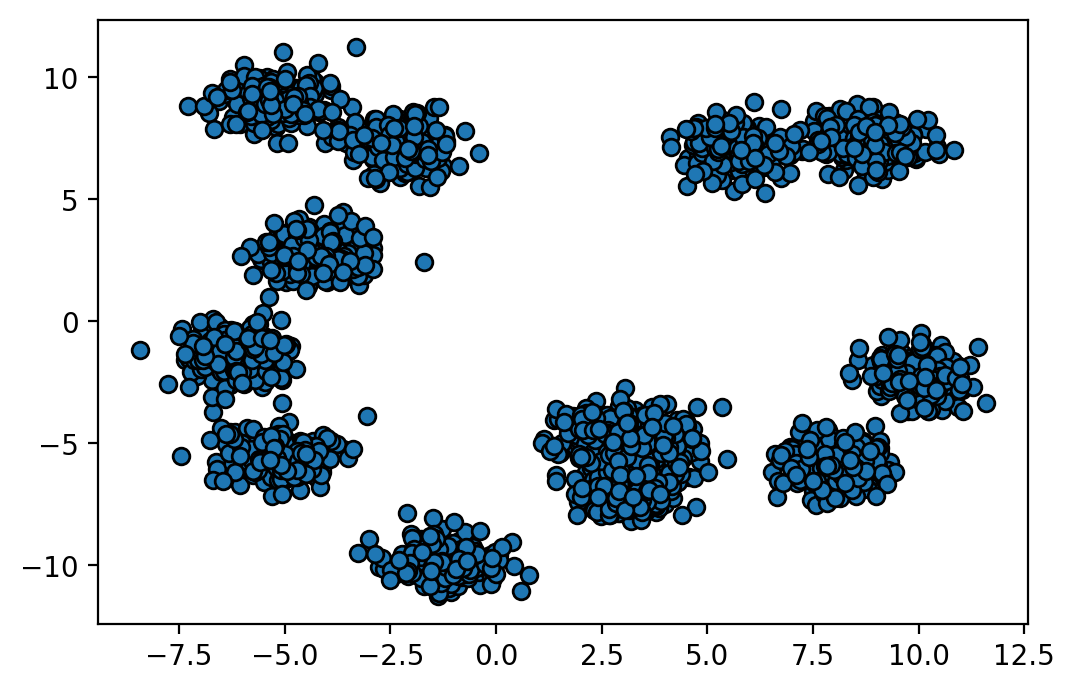

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"]= 200
plt.scatter(data["f1"], data["f2"], marker="o" , edgecolors="black")

plt.show()

In [7]:
import numpy as np
data_modelo = []

#percorrendo linha a linha dos dados para transformar os dados em lista de lista
for linha in data.itertuples():
  temp = [linha.f1 , linha.f2]
  data_modelo.append(temp)

data = np.array(data_modelo)
data

array([[-6.2107859 , -1.96848384],
       [-5.218359  ,  7.97971189],
       [-4.8601927 ,  3.16259289],
       ...,
       [-6.47251776, -6.5350059 ],
       [ 8.4674595 ,  7.12065962],
       [-5.34596185, -0.76567561]])

In [13]:
from sklearn.cluster import KMeans

distortions = []
#achando que tem entre 1 a 21 grupos 
for qtd in range(1,25):
  modelo =  KMeans(n_clusters=qtd)
  modelo.fit(data)

  #media das somas das distancias de cada ponto para o centroide do seu grupo
  metrica = modelo.inertia_
  distortions.append(metrica)

In [14]:
# é a avalição criada de cada modelo q ele fez com 1,2,3...12 grupos e ve qual fico melhor
distortions

[175412.96851868412,
 90924.99451930154,
 52604.491102463406,
 28031.99313652842,
 17224.715087007564,
 11676.004206318266,
 8198.453601659836,
 6442.107186264995,
 5322.454080388254,
 3688.0419822820863,
 2715.5767709288184,
 2152.5579766312476,
 1994.153927778205,
 1923.0405389190669,
 1865.6887106547078,
 1800.2337451961525,
 1744.8930818156573,
 1681.0653383330412,
 1630.778042698375,
 1579.665377260012,
 1509.9943383347106,
 1464.5619356876127,
 1400.8625862789986,
 1363.1195784639135]

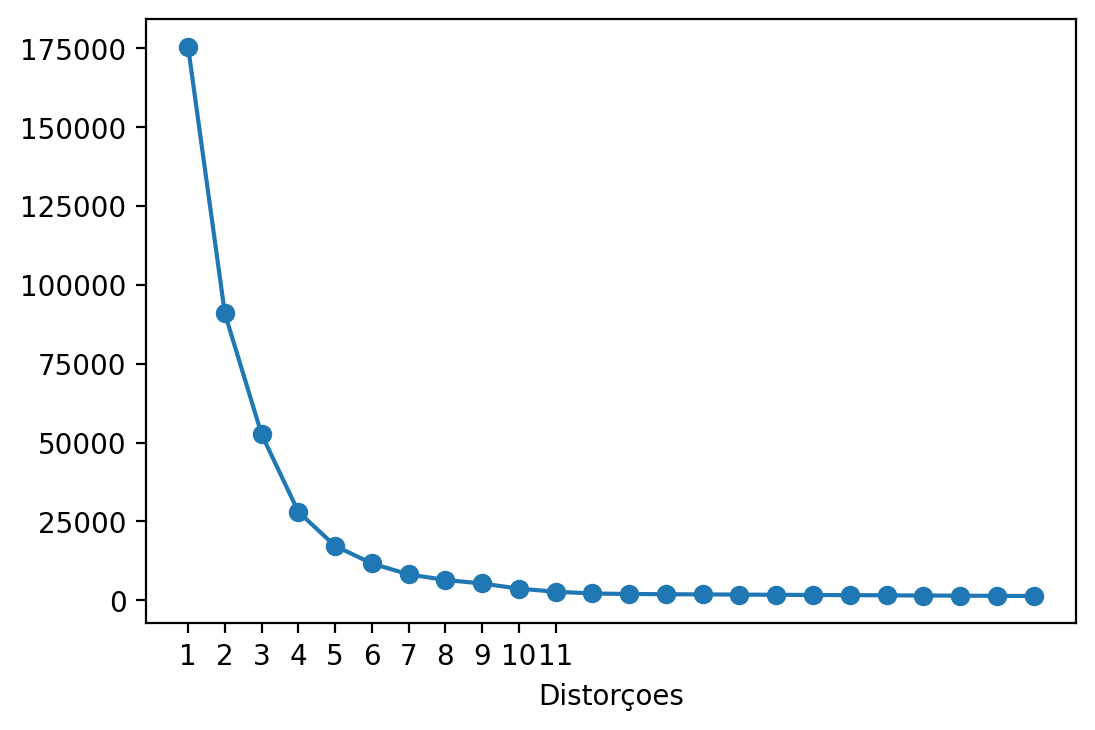

In [15]:
plt.rcParams["figure.dpi"] =200

plt.plot(range(1,25), distortions , marker="o")

plt.xlabel("quantidade de grupos")
plt.xlabel("Distorçoes")

plt.xticks(range(1,12))

plt.show()

In [16]:
modelo = KMeans(n_clusters=11)
modelo.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
resposta = modelo.predict(data)

In [18]:
# ver se o metodo usado foi bom,se a maquina deu uma resposta boa 
from sklearn.metrics import calinski_harabasz_score, silhouette_score

# silhouette_score(dados, respostas que o model achou )
# sh = varia de -1 a 1 (quanto mais proximo de 1 melhor )quer dizer q a bolinha esta mais semelhante a aquele grupo analisado mesmo
sh = silhouette_score(data, modelo.labels_ )

# calinski_harabasz_score(dados, respostas que o model achou )
#ch = quanto maior melhor 
ch = calinski_harabasz_score(data, modelo.labels_ )

print(f"SH: {sh}") # se o SH ele computa a media de todas as amostras
print("CH: ", ch) 

SH: 0.6840756156450339
CH:  15828.821805437012


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

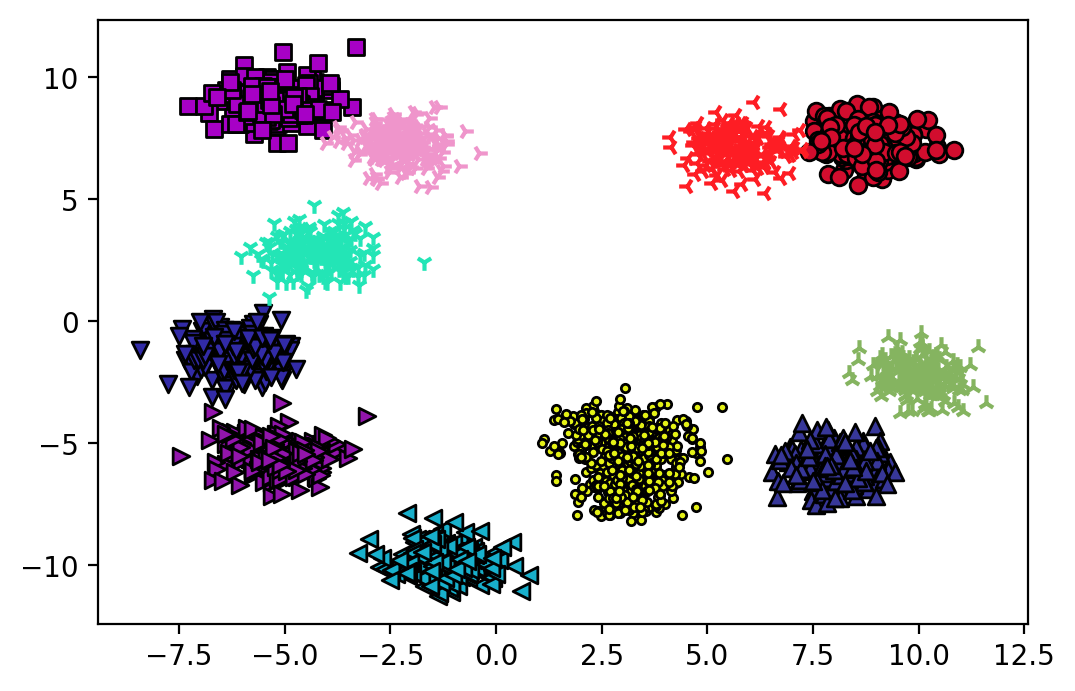

In [19]:
#Visualização da prediçao
from matplotlib.lines import Line2D

markers= list(Line2D.markers.keys())

for i in range(13):
  grupo=data[resposta== i]
  plt.scatter(grupo[:,0], grupo[:,1], c =np.random.rand(3), marker= markers[i], edgecolors="black")
  
plt.show()

Elbow Method é um Método gráfico que consiste em criar vários modelos e depois avaliar e se avalia no ponto no qual a curva do joelho começou a ficar continuo , nesse ponto sera defino o clurster ou seja em quantos grupos dera separado os dados